# Holmberg
In 1941, Erik Holmberg performed arguably the first N-body simulation on the dynamics of interacting galaxies. He used light bulbs to simulate the gravitational interaction of stars as both gravitational force and light intensity fall of as $1/r^2$ with distance. This notebook recreates Holmberg's N-body simulation. Instead of lightbulbs, we use REBOUND. More information about Erik Holmberg can be found on [wikipedia](<https://en.wikipedia.org/wiki/Erik_Holmberg_(astronomer)>). His paper can be found on [ADS](http://adsabs.harvard.edu/abs/1941ApJ....94..385H).

In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt

First, we setup the initial conditions of one galaxy. The velocities are chosen such that the particles are initially on approximately circular orbits. The arrangement roughly matches that of Holmberg's experiment.

In [2]:
sim = rebound.Simulation()

sim.add(m=1) # central object

# 4 rings
lamps = [{"N": 6, "m": 1, "r": 1, "v": np.sqrt(4.1/2)},
         {"N": 8, "m": 1, "r": 2, "v": np.sqrt(9/2)},
         {"N": 10, "m": 0.7, "r": 3, "v": np.sqrt(15/2)},
         {"N": 12, "m": 0.3, "r": 4, "v": np.sqrt(16/2)}]

for l in lamps:
    for i in range(l["N"]):
        phi = i/l["N"]*2*np.pi
        x, y = l["r"]*np.sin(phi), l["r"]*np.cos(phi)
        vx, vy = l["v"]*np.cos(phi), -l["v"]*np.sin(phi)
        sim.add(m=l["m"], x=x, y=y, vx=vx, vy=vy)

Let us plot the galaxy we just created.

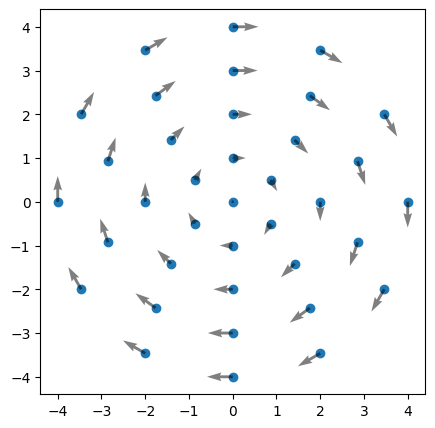

In [3]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
ax.set_aspect("equal")
coords = np.zeros((sim.N, 6))
sim.serialize_particle_data(xyzvxvyvz=coords)
ax.scatter(coords[:,0],coords[:,1])
ax.quiver(coords[:,0],coords[:,1],coords[:,3],coords[:,4], alpha=0.5);

Next, we add the second galaxy and put the two galaxies on a collision course. To do that, we simply copy the first galaxy and offset it.

In [4]:
N = sim.N
for i in range(N):
    p = sim.particles[i].copy() # make a copy of the particle in the simulation
    p.x += 8 # offset
    p.y += 8 # offset
    p.vx -= 6 # set up collision course
    sim.add(p) # add the copy
sim.move_to_com() # Move to the center of mass frame

Next, let's run the simulation and take snapshots of the particle positions and velocities at 9 intervals. We set a smoothing length to smear out gravity on small scales so that close encounters between particles don't slow down our simulation. The physical size of the lightbulbs would have had the same effect.

In [5]:
sim.softening = 0.2 # smoothing length
N = 9
coords = np.zeros((N,sim.N,3))
times = np.linspace(0,4.,N)
for i,t in enumerate(times):
    sim.integrate(t)
    sim.serialize_particle_data(xyz=coords[i])

Finally, let's plot the results.

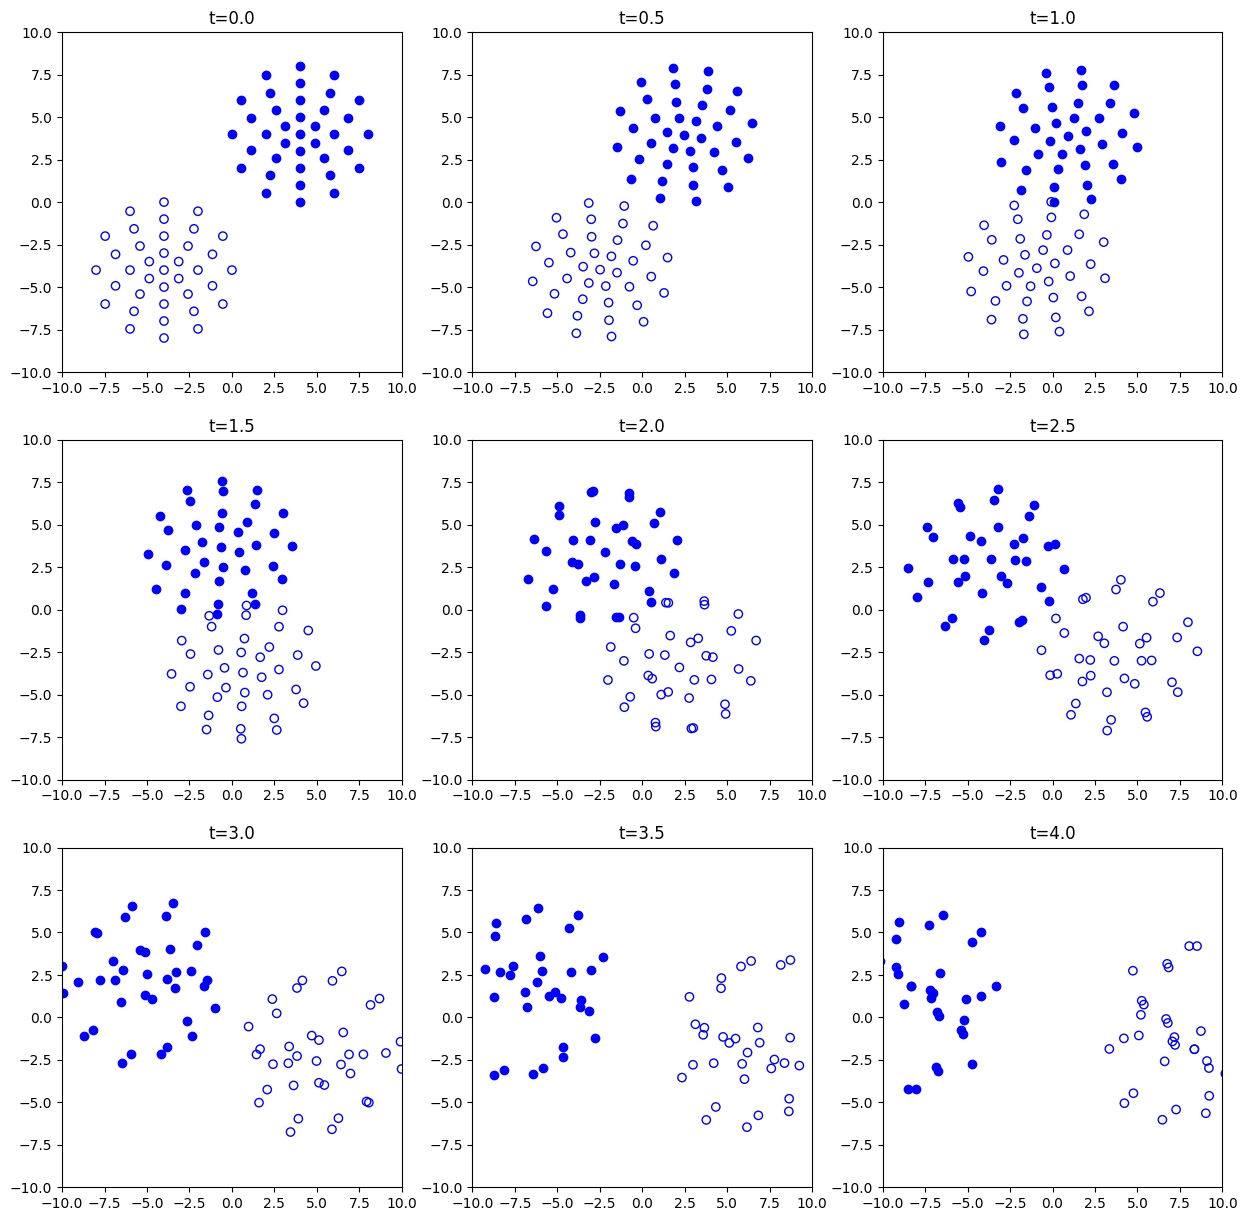

In [6]:
f, axarr = plt.subplots(3, 3, figsize=(15,15))
for i,axs in enumerate(axarr):
    for j,ax in enumerate(axs):
        ax.set_aspect("equal")
        ax.set_xlim([-10,10])
        ax.set_ylim([-10,10])
        ax.scatter(coords[i*3+j,:sim.N//2,0],coords[i*3+j,:sim.N//2,1],facecolors='none', edgecolors='b')
        ax.scatter(coords[i*3+j,sim.N//2:,0],coords[i*3+j,sim.N//2:,1],facecolors='b')
        ax.set_title("t=%.1f"%(times[i*3+j]))

Holmberg pointed out the aparent spiral arms in the post collision snapshots in his paper. You can see them in the above plots as well. However, note that this simulation is very rudimentary and a claim that it explains the occurance of spiral arms in galaxies would not hold up. One of the most obvious shortcomes of our model is that a typical galaxy contains 100 billion stars but our model contains only 37 particles.